##### **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix

##### **Import Data**

In [2]:
Data = pd.read_csv("EEG_Eye_State_Classification.csv")

##### **Save in DataFrame**

In [3]:
Df = pd.DataFrame(Data)
Df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


# **Preprocessing**

##### **Little Numerical Describe of DataSet**

In [4]:
Df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [5]:
Df.corr()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
AF3,1.000000,0.261146,0.474569,0.012173,0.278938,0.007958,0.006630,0.040539,0.999607,-0.070801,0.572997,-0.394334,0.998714,0.012070,0.010458
F7,0.261146,1.000000,0.583317,-0.208922,-0.250816,-0.042288,-0.210591,0.517816,0.264922,0.489010,0.317418,0.275977,0.251327,-0.071895,-0.079994
F3,0.474569,0.583317,1.000000,-0.330162,-0.272186,-0.596566,-0.335514,0.221270,0.486506,0.191273,0.517950,0.116761,0.500276,-0.637363,0.038902
FC5,0.012173,-0.208922,-0.330162,1.000000,0.504616,0.009049,0.999961,0.130482,0.013228,-0.519498,0.420311,0.515388,-0.005351,0.161155,-0.007531
T7,0.278938,-0.250816,-0.272186,0.504616,1.000000,0.409277,0.504231,-0.030063,0.264913,-0.225508,0.336173,-0.095902,0.267107,0.478852,-0.000369
P7,0.007958,-0.042288,-0.596566,0.009049,0.409277,1.000000,0.013707,0.208167,-0.012528,0.420539,-0.196873,-0.229149,-0.030921,0.988310,-0.007845
O1,0.006630,-0.210591,-0.335514,0.999961,0.504231,0.013707,1.000000,0.133434,0.007638,-0.515699,0.417041,0.517621,-0.011080,0.165730,-0.007223
O2,0.040539,0.517816,0.221270,0.130482,-0.030063,0.208167,0.133434,1.000000,0.047843,0.640387,0.433333,0.577013,0.020493,0.224627,0.025100
P8,0.999607,0.264922,0.486506,0.013228,0.264913,-0.012528,0.007638,0.047843,1.000000,-0.074047,0.577472,-0.385643,0.998849,-0.008055,0.009576
T8,-0.070801,0.489010,0.191273,-0.519498,-0.225508,0.420539,-0.515699,0.640387,-0.074047,1.000000,0.038252,0.132692,-0.082256,0.336282,0.047218


##### Comparison (+) effects on [eyeDetection]:

##### Comparison (-) effects on [eyeDetection]:

##### Pure Comparison:

### **Signals VS eyeDetection, Noise Handling**

In [6]:
Df1 = Df.copy()

##### **AF3**

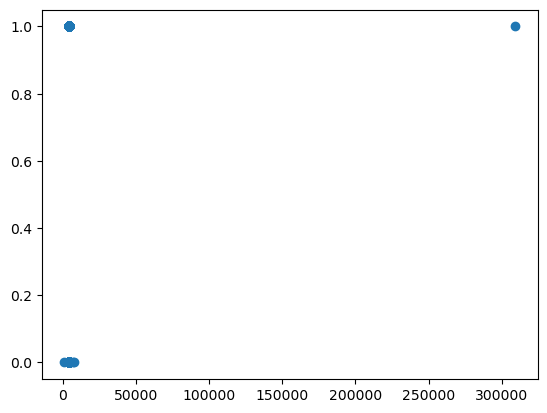

In [7]:
plt.scatter(Df1["AF3"], Df1["eyeDetection"])

In [8]:
Df1[Df1["AF3"]>5000]

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
898,7222.05,3797.95,1040.00,3733.85,6040.51,362564.00,6350.26,5361.54,1357.95,6215.38,3273.33,3091.28,276.41,715897.00,0
10386,7398.46,2830.77,2457.44,642564.00,6474.36,8092.31,567179.00,5087.69,7143.59,1816.41,6137.95,6904.62,3504.10,121026.00,0
11509,309231.00,5500.51,6880.51,5416.41,5454.87,4002.05,2086.15,4770.26,265641.00,3914.87,6823.08,2257.95,152308.00,5022.56,1


In [9]:
Df1[Df1["AF3"]<4000]

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
13179,1030.77,7804.62,5762.56,2453.33,2089.74,2768.21,3581.54,7264.1,4586.15,6674.36,5170.77,7002.56,86.6667,1366.15,0


In [10]:
Df1 = Df1.drop([898])
Df1 = Df1.drop([10386])
Df1 = Df1.drop([11509])
Df1 = Df1.drop([13179])

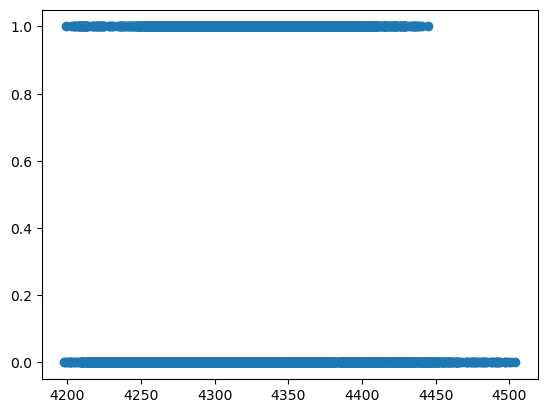

In [11]:
plt.scatter(Df1["AF3"], Df1["eyeDetection"])

##### **F7**

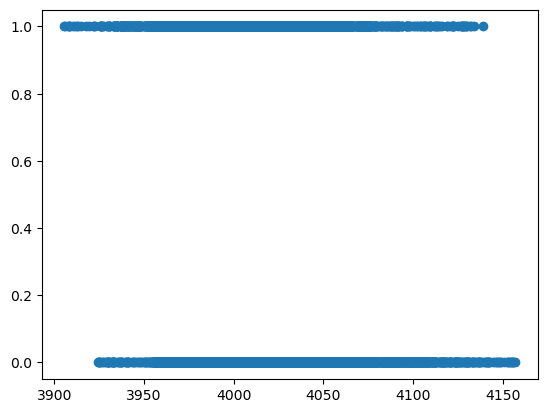

In [12]:
plt.scatter(Df1["F7"], Df1["eyeDetection"])

##### **F3**

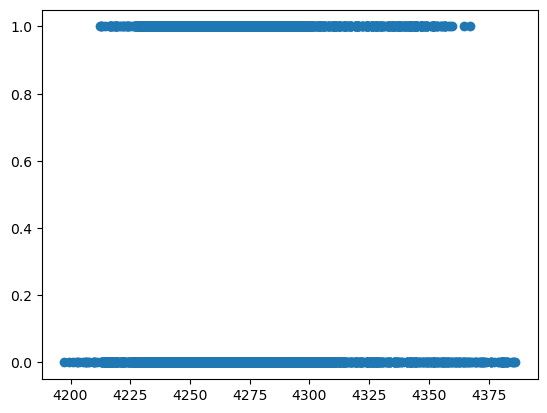

In [13]:
plt.scatter(Df1["F3"], Df1["eyeDetection"])

##### **FC5**

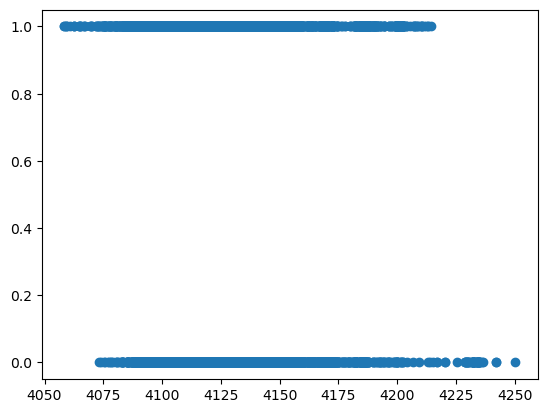

In [14]:
plt.scatter(Df1["FC5"], Df1["eyeDetection"])

##### **T7**

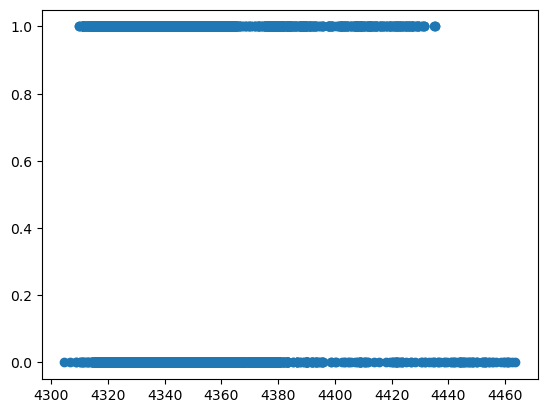

In [15]:
plt.scatter(Df1["T7"], Df1["eyeDetection"])

##### **P7**

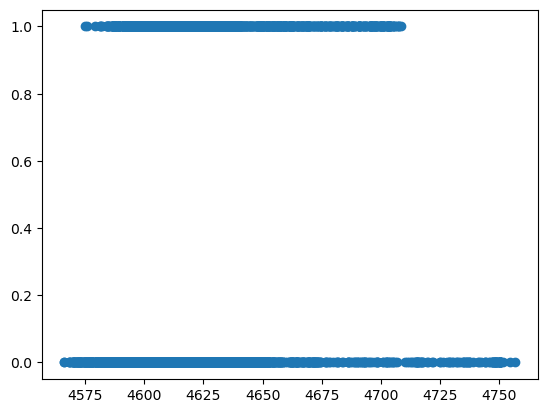

In [16]:
plt.scatter(Df1["P7"], Df1["eyeDetection"])

##### **O1**

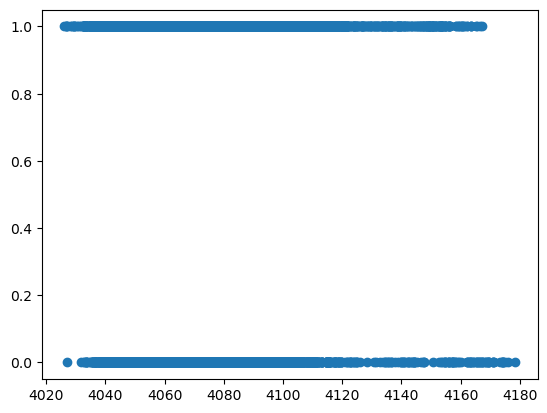

In [17]:
plt.scatter(Df1["O1"], Df1["eyeDetection"])

##### **O2**

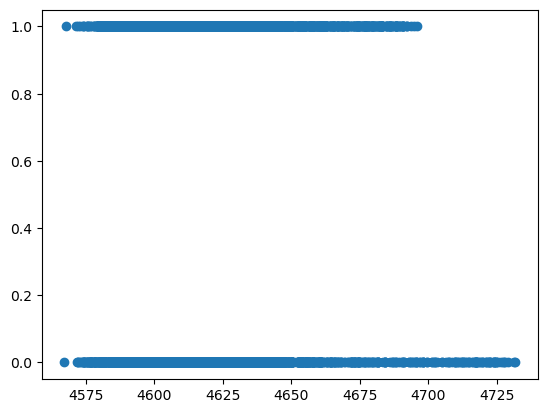

In [18]:
plt.scatter(Df1["O2"], Df1["eyeDetection"])

##### **P8**

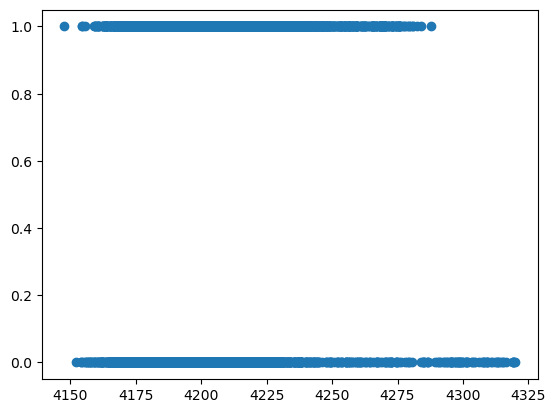

In [19]:
plt.scatter(Df1["P8"], Df1["eyeDetection"])

##### **T8**

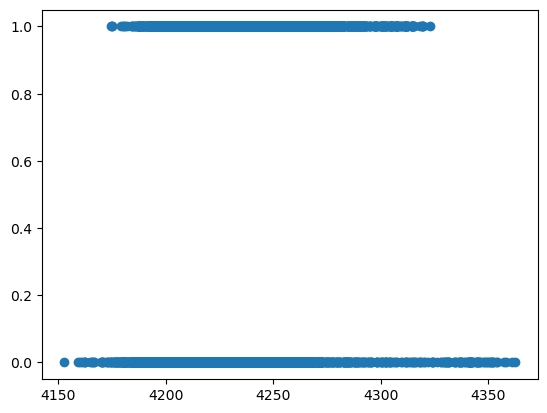

In [20]:
plt.scatter(Df1["T8"], Df1["eyeDetection"])

##### **FC6**

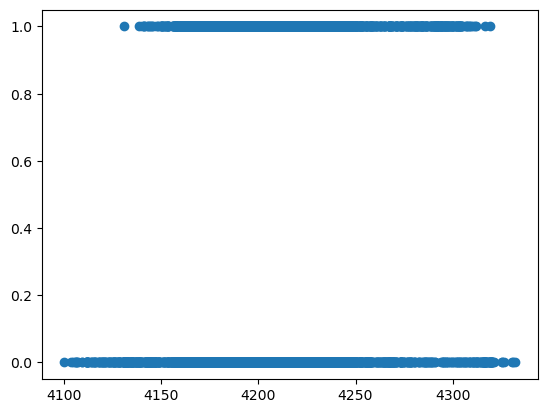

In [21]:
plt.scatter(Df1["FC6"], Df1["eyeDetection"])

##### **F4**

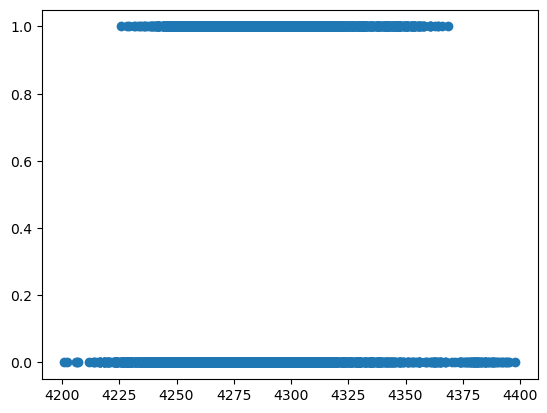

In [22]:
plt.scatter(Df1["F4"], Df1["eyeDetection"])

##### **F8**

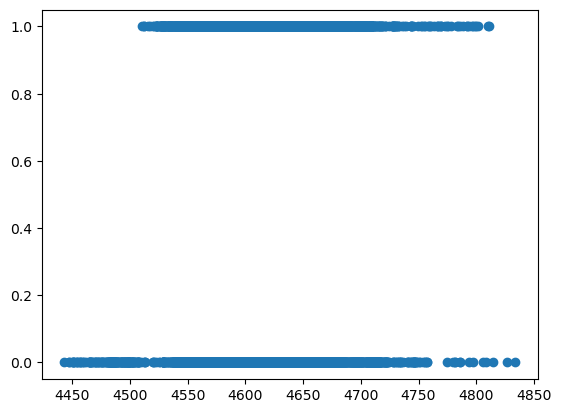

In [23]:
plt.scatter(Df1["F8"], Df1["eyeDetection"])

##### **AF4**

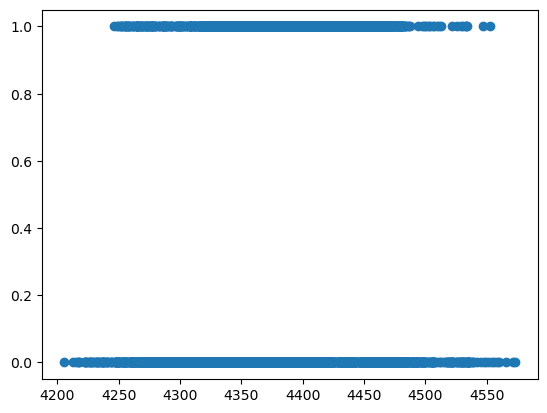

In [24]:
plt.scatter(Df1["AF4"], Df1["eyeDetection"])

### **Final DataFrame**

In [25]:
Df1.reset_index(drop=True, inplace=True)
Df1

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14972,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14973,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14974,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


# **Model Creation (Ensemble Learning)**

##### **Logistic Regression**

In [26]:
x = pd.DataFrame(Df1, columns = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"])
y = Df1.eyeDetection

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
clf = LogisticRegression(solver='liblinear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6335113484646195


##### Cross Validation

In [27]:
scores = cross_val_score(clf, x, y, cv=10)
print("1:0-1500 / 2:1500-3000 / 3:3000-4500 / 4:4500-6000 / 5:6000-7500")
print("6:7500-9000 / 7:9000-10500 / 8:10500-12000 / 9:12000-13500 / 10:13500-15000", "\n")
print(scores)

1:0-1500 / 2:1500-3000 / 3:3000-4500 / 4:4500-6000 / 5:6000-7500
6:7500-9000 / 7:9000-10500 / 8:10500-12000 / 9:12000-13500 / 10:13500-15000 

[0.41655541 0.58878505 0.47329773 0.58878505 0.40987984 0.23898531
 0.62658651 0.29058116 0.53306613 0.60387442]


In [28]:
Df2 = Df1.copy()

Df2.drop(Df2.index[7500:9000], inplace=True) #6(23%)
Df2.drop(Df2.index[10500:12000], inplace=True) #8(29%)

Df2.reset_index(drop=True, inplace=True)

Df2

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11971,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
11972,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
11973,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
11974,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


##### The Best model

In [29]:
x = pd.DataFrame(Df2, columns = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"])
y = Df2.eyeDetection

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
classifier_logreg = LogisticRegression(solver='liblinear')
classifier_logreg.fit(x_train, y_train)
y_pred = classifier_logreg.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix :", '\n', confusion_matrix(y_test, y_pred))

Accuracy:  0.6949081803005008
Confusion Matrix : 
 [[1189  190]
 [ 541  476]]


##### **Naive Bayes**

In [30]:
x = pd.DataFrame(Df1, columns = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"])
y = Df1.eyeDetection

best_testsize = 0
acc = 0
best_acc = 0
for z in range(1,5):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=z/10, random_state=0)
    clf = GaussianNB()
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    if acc > best_acc:
        best_testsize = z / 10
        best_acc = acc
print("The Best Test Size: ", best_testsize)
print("The Best Accuracy: ", best_acc)

The Best Test Size:  0.2
The Best Accuracy:  0.6128170894526035


##### Cross Validation

In [31]:
scores = cross_val_score(clf, x, y, cv=10)
print("1:0-1500 / 2:1500-3000 / 3:3000-4500 / 4:4500-6000 / 5:6000-7500")
print("6:7500-9000 / 7:9000-10500 / 8:10500-12000 / 9:12000-13500 / 10:13500-15000", "\n")
print(scores)

1:0-1500 / 2:1500-3000 / 3:3000-4500 / 4:4500-6000 / 5:6000-7500
6:7500-9000 / 7:9000-10500 / 8:10500-12000 / 9:12000-13500 / 10:13500-15000 

[0.64886515 0.55340454 0.33110814 0.46929239 0.47863818 0.59946595
 0.08350033 0.56646627 0.64061456 0.3253173 ]


In [32]:
Df2 = Df1.copy()

Df2.drop(Df2.index[3000:4500], inplace=True) #3(33%)
Df2.drop(Df2.index[9000:10500], inplace=True) #7(8%)
Df2.drop(Df2.index[13500:15000], inplace=True) #10(32%)

Df2.reset_index(drop=True, inplace=True)

Df2

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11971,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
11972,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
11973,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
11974,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


##### The Best Model

In [33]:
x = pd.DataFrame(Df2, columns = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"])
y = Df2.eyeDetection

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)
y_pred = classifier_nb.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix :", '\n', confusion_matrix(y_test, y_pred))

Accuracy:  0.6556761268781303
Confusion Matrix : 
 [[1087  332]
 [ 493  484]]


##### **KNN**

In [34]:
x = pd.DataFrame(Df1, columns = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"])
y = Df1.eyeDetection

best_testsize = 0
best_k = 0
acc = 0
best_acc = 0
for z in range(1,3):
    for i in range(1,10):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=z/10, random_state=0)
        clf = KNeighborsClassifier(i)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_testsize = z / 10
            best_k = i
            best_acc = acc
print("The Best Test Size: ", best_testsize)
print("The Best K: ", best_k)
print("The Best Accuracy: ", best_acc)

The Best Test Size:  0.1
The Best K:  1
The Best Accuracy:  0.9833110814419226


##### Cross Validation

In [35]:
scores = cross_val_score(clf, x, y, cv=10)
print("1:0-1500 / 2:1500-3000 / 3:3000-4500 / 4:4500-6000 / 5:6000-7500")
print("6:7500-9000 / 7:9000-10500 / 8:10500-12000 / 9:12000-13500 / 10:13500-15000", "\n")
print(scores)

1:0-1500 / 2:1500-3000 / 3:3000-4500 / 4:4500-6000 / 5:6000-7500
6:7500-9000 / 7:9000-10500 / 8:10500-12000 / 9:12000-13500 / 10:13500-15000 

[0.59813084 0.60213618 0.68558077 0.7823765  0.41188251 0.41989319
 0.37140949 0.65597862 0.68470274 0.50835003]


In [36]:
Df2 = Df1.copy()

Df2.drop(Df2.index[6000:7500], inplace=True) #5(41%)
Df2.drop(Df2.index[7500:9000], inplace=True) #6(41%)
Df2.drop(Df2.index[9000:10500], inplace=True) #7(37%)

Df2.reset_index(drop=True, inplace=True)

Df2

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10471,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
10472,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
10473,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
10474,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


##### Final Model

In [37]:
x = pd.DataFrame(Df2, columns = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"])
y = Df2.eyeDetection

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
classifier_knn = KNeighborsClassifier(3)
classifier_knn.fit(x_train, y_train)
y_pred = classifier_knn.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix :", '\n', confusion_matrix(y_test, y_pred))

Accuracy:  0.9856870229007634
Confusion Matrix : 
 [[478   8]
 [  7 555]]


##### **Decision Trees**

In [38]:
x = pd.DataFrame(Df1, columns = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"])
y = Df1.eyeDetection

best_testsize = 0
best_depth = 0
acc = 0
best_acc = 0
for z in range(1,3):
    for i in range(20,40):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=z/10, random_state=0)
        clf = DecisionTreeClassifier(max_depth=i, random_state=0)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_testsize = z / 10
            best_depth = i
            best_acc = acc
print("The Best Test Size: ", best_testsize)
print("The Best Max Depth: ", best_depth)
print("The Best Accuracy: ", best_acc)

The Best Test Size:  0.1
The Best Max Depth:  24
The Best Accuracy:  0.8564753004005341


##### Cross Validation

In [39]:
scores = cross_val_score(clf, x, y, cv=10)
print("1:0-1500 / 2:1500-3000 / 3:3000-4500 / 4:4500-6000 / 5:6000-7500")
print("6:7500-9000 / 7:9000-10500 / 8:10500-12000 / 9:12000-13500 / 10:13500-15000", "\n")
print(scores)

1:0-1500 / 2:1500-3000 / 3:3000-4500 / 4:4500-6000 / 5:6000-7500
6:7500-9000 / 7:9000-10500 / 8:10500-12000 / 9:12000-13500 / 10:13500-15000 

[0.55540721 0.59279039 0.60213618 0.68691589 0.40854473 0.43457944
 0.44355377 0.61990648 0.63927856 0.43687375]


In [40]:
Df2 = Df1.copy()

Df2.drop(Df2.index[6000:7500], inplace=True) #5(40%)
Df2.drop(Df2.index[7500:9000], inplace=True) #6(43%)
Df2.drop(Df2.index[9000:10500], inplace=True) #7(44%)
Df2.drop(Df2.index[13500:15000], inplace=True) #10(43%)

Df2.reset_index(drop=True, inplace=True)

Df2

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10471,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
10472,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
10473,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
10474,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


##### Final Model

In [41]:
x = pd.DataFrame(Df2, columns = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"])
y = Df2.eyeDetection

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
classifier_dts = DecisionTreeClassifier(max_depth=24, random_state=0)
classifier_dts.fit(x_train, y_train)
y_pred = classifier_dts.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix :", '\n', confusion_matrix(y_test, y_pred))

Accuracy:  0.8893129770992366
Confusion Matrix : 
 [[418  68]
 [ 48 514]]


##### **Random Forest**

In [42]:
x = pd.DataFrame(Df1, columns = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"])
y = Df1.eyeDetection

best_testsize = 0
best_depth = 0
acc = 0
best_acc = 0
for z in range(1,3):
    for i in range(20,30):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=z/10, random_state=0)
        clf = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=0)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_testsize = z / 10
            best_depth = i
            best_acc = acc
print("The Best Test Size: ", best_testsize)
print("The Best Max Depth: ", best_depth)
print("The Best Accuracy: ", best_acc)

The Best Test Size:  0.2
The Best Max Depth:  27
The Best Accuracy:  0.9335781041388518


##### Cross Validation

In [43]:
scores = cross_val_score(clf, x, y, cv=10)
print("1:0-1500 / 2:1500-3000 / 3:3000-4500 / 4:4500-6000 / 5:6000-7500")
print("6:7500-9000 / 7:9000-10500 / 8:10500-12000 / 9:12000-13500 / 10:13500-15000", "\n")
print(scores)

1:0-1500 / 2:1500-3000 / 3:3000-4500 / 4:4500-6000 / 5:6000-7500
6:7500-9000 / 7:9000-10500 / 8:10500-12000 / 9:12000-13500 / 10:13500-15000 

[0.56074766 0.65420561 0.68491322 0.81375167 0.45861148 0.41989319
 0.41416166 0.70207081 0.70674683 0.50701403]


In [44]:
Df2 = Df1.copy()

Df2.drop(Df2.index[6000:7500], inplace=True) #5(45%)
Df2.drop(Df2.index[7500:9000], inplace=True) #6(41%)
Df2.drop(Df2.index[9000:10500], inplace=True) #7(41%)

Df2.reset_index(drop=True, inplace=True)

Df2

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10471,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
10472,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
10473,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
10474,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


##### Final Model

In [45]:
x = pd.DataFrame(Df2, columns = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"])
y = Df2.eyeDetection

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
classifier_rf = RandomForestClassifier(n_estimators=100, max_depth=27, random_state=0)
classifier_rf.fit(x_train, y_train)
y_pred = classifier_rf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix :", '\n', confusion_matrix(y_test, y_pred))

Accuracy:  0.954675572519084
Confusion Matrix : 
 [[ 918   50]
 [  45 1083]]


##### **SVM**

In [46]:
x = pd.DataFrame(Df1, columns = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"])
y = Df1.eyeDetection

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
clf = SVC(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6261682242990654


##### Cross Validation

In [47]:
scores = cross_val_score(clf, x, y, cv=10)
print("1:0-1500 / 2:1500-3000 / 3:3000-4500 / 4:4500-6000 / 5:6000-7500")
print("6:7500-9000 / 7:9000-10500 / 8:10500-12000 / 9:12000-13500 / 10:13500-15000", "\n")
print(scores)

1:0-1500 / 2:1500-3000 / 3:3000-4500 / 4:4500-6000 / 5:6000-7500
6:7500-9000 / 7:9000-10500 / 8:10500-12000 / 9:12000-13500 / 10:13500-15000 

[0.44192256 0.67957276 0.50667557 0.64886515 0.55140187 0.32576769
 0.25651303 0.52104208 0.60921844 0.49832999]


In [48]:
Df2 = Df1.copy()

Df2.drop(Df2.index[6000:7500], inplace=True) #1(44%)
Df2.drop(Df2.index[7500:9000], inplace=True) #6(32%)
Df2.drop(Df2.index[9000:10500], inplace=True) #7(25%)
Df2.drop(Df2.index[9000:10500], inplace=True) #10(49%)

Df2.reset_index(drop=True, inplace=True)

Df2

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,4317.95,4025.64,4275.90,4143.59,4377.44,4645.64,4092.82,4643.08,4233.85,4252.82,4221.03,4300.00,4644.62,4394.87,1
8996,4328.21,4032.31,4285.13,4148.21,4379.49,4648.72,4098.97,4648.21,4241.03,4258.46,4224.62,4304.62,4643.59,4396.92,1
8997,4326.15,4030.26,4283.08,4141.54,4376.41,4648.72,4102.56,4650.26,4231.79,4254.87,4224.10,4299.49,4636.41,4391.79,1
8998,4320.00,4031.28,4277.95,4143.08,4377.95,4648.21,4102.56,4644.62,4228.21,4255.90,4229.23,4297.95,4643.08,4394.36,1


##### The Best Model

In [49]:
x = pd.DataFrame(Df2, columns = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"])
y = Df2.eyeDetection

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
classifier_svc = SVC(random_state=0)
classifier_svc.fit(x_train, y_train)
y_pred = classifier_svc.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix :", '\n', confusion_matrix(y_test, y_pred))

Accuracy:  0.6666666666666666
Confusion Matrix : 
 [[ 65 279]
 [ 21 535]]


### **Comparison**

##### **Logistic Regression**

##### **Naive Bayes**

##### **KNN**

##### **Decision Trees**

##### **Random Forest**

##### **SVM**

##### **1. KNN(98%) > 2. Random Forest(95%) > 3. Decision Trees(88%)**

##### **WINNER : KNN**

# **Predictor**

In [50]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [51]:
DATA = pd.read_csv("EEG_Eye_State_Classification.csv")
DF = pd.DataFrame(DATA)

DF = DF.drop([898])
DF = DF.drop([10386])
DF = DF.drop([11509])
DF = DF.drop([13179])
DF.reset_index(drop=True, inplace=True)

DF.drop(DF.index[3000:4500], inplace=True)
DF.drop(DF.index[9000:10500], inplace=True)
DF.drop(DF.index[13500:15000], inplace=True)
DF.reset_index(drop=True, inplace=True)

X = pd.DataFrame(DF, columns = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"])
Y = DF.eyeDetection

KNN_CLF = KNeighborsClassifier(3)
KNN_CLF.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

In [52]:
AF3 = input("AF3: ")
F7 = input("F7: ")
F3 = input("F3: ")
FC5 = input("FC5: ")
T7 = input("T7: ")
P7 = input("P7: ")
O1 = input("O1: ")
O2 = input("O2: ")
P8 = input("P8: ")
T8 = input("T8: ")
FC6 = input("FC6: ")
F4 = input("F4: ")
F8 = input("F8: ")
AF4 = input("AF4: ")

SAMPLE = pd.DataFrame(data={"AF3": [AF3],
                            "F7": [F7],
                            "F3": [F3],
                            "FC5": [FC5],
                            "T7": [T7],
                            "P7": [P7],
                            "O1": [O1],
                            "O2": [O2],
                            "P8": [P8],
                            "T8": [T8],
                            "FC6": [FC6],
                            "F4": [F4],
                            "F8": [F8],
                            "AF4": [AF4]})

PREDICTION = KNN_CLF.predict(SAMPLE)
if PREDICTION == 1:
    print("The eyes are opened.")
else:
    print("The eyes are closed.") 

AF3:  4300
F7:  4000
F3:  4250
FC5:  4150
T7:  4400
P7:  4700
O1:  4100
O2:  4650
P8:  4200
T8:  4300
FC6:  4200
F4:  4300
F8:  4650
AF4:  4400


The eyes are opened.
